In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install textblob
!pip install emoji

In [2]:
comments=pd.read_csv("UScomments.csv",error_bad_lines=False)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [4]:
comments.shape

(691400, 4)

In [5]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [6]:
comments.dropna(inplace=True)

In [7]:
from textblob import TextBlob

In [8]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [9]:
TextBlob("trending 😉").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [10]:
polarity=[]
for i in comments['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [11]:
polarity[0:6]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [12]:
comments['Polarity']=polarity

In [13]:
comments.head(25)

video_id                                       comment_text likes  \
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
12  XpVt6Z1Gjjo  Honestly Evan is so annoying. Like its not fun...     0   
13  XpVt6Z1Gjjo                   Casey is still better then logan     0   
14  XpVt6Z1Gjjo      aw geez rick this guy is the face of YouTube.     0   
15  XpVt6Z1Gjjo                       He happy cause he in a movie     0   
16  XpVt6Z1Gjjo  Ayyyyoooo Logang what up .  This was a hard vl...     1   
17  XpVt6Z1Gjjo  Bro y didnt u give merch to johannes he is ur ...     0   
18  XpVt6Z1Gjjo  It's been fun watching you grow. I'm at 42 day...     3   
19  XpVt6Z1Gjjo             Made a lot of people hate youtube - GJ     0   
20  XpVt6Z1Gjjo  NO HONEY NOOO can't believe he has almost 12 m...     0   
21  XpVt6Z1Gjjo  Jake Paul is the fastest growing channel to hi...     1   
22  XpVt6Z1Gjjo  lol PEWDIEPIE accidentally played song with wo...     0   
23  XpVt6Z1Gjjo  You should do a prank that you broke  your pla...     0   
24  XpVt6Z1Gjjo  I love Logan and Jake so much and thay are so ...     1   

   replies  Polarity  
0        0  0.000000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000  
12       0 -0.023333  
13       0  0.500000  
14       0  0.000000  
15       0  0.800000  
16       0 -0.291667  
17       0  0.000000  
18       0  0.250000  
19       0 -0.800000  
20       0  0.000000  
21       0  0.000000  
22       0  0.650000  
23       0  0.000000  
24       0  0.375000

In [14]:
comments_positive=comments[comments['Polarity']==1]
comments_negative=comments[comments['Polarity']==-1]

In [15]:
comments_positive.head()

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  Polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0

In [16]:
comments_negative.head()

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   

     replies  Polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0

In [17]:
!pip install wordcloud

In [18]:
from wordcloud import WordCloud, STOPWORDS

In [19]:
negative_comments=' '.join(comments_negative['comment_text'])

In [20]:
negative_comments

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how truly insane he is… WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!! WTF BRUH!!!!!! cheeseus christ thats insane!!! this is the worst thing i've heard. ever. Economy is horrible in Cuba. It's going to be years before they get out of this. Sub to me if this is terrible PATHETIC I don't like this sportscaster  sounds very annoying commentators are awful This tv show became trump witch hunt tube... and frankly, boring. Arpaio should be arrested again for horribly butchering that song. This  show has become one-noted and pathetic. HARD CANDY!!!!!!!!!!! Tired of the philosophy add !!!!!!! boring 0:22   **laughs at terrible pun** Why is media even covering this disgusting woman anymore? How is this trending ? Awful a horrible attempt to try and get us to freak out this is one of the worst videos I've ever seen Whats with the horrible music? tf She 

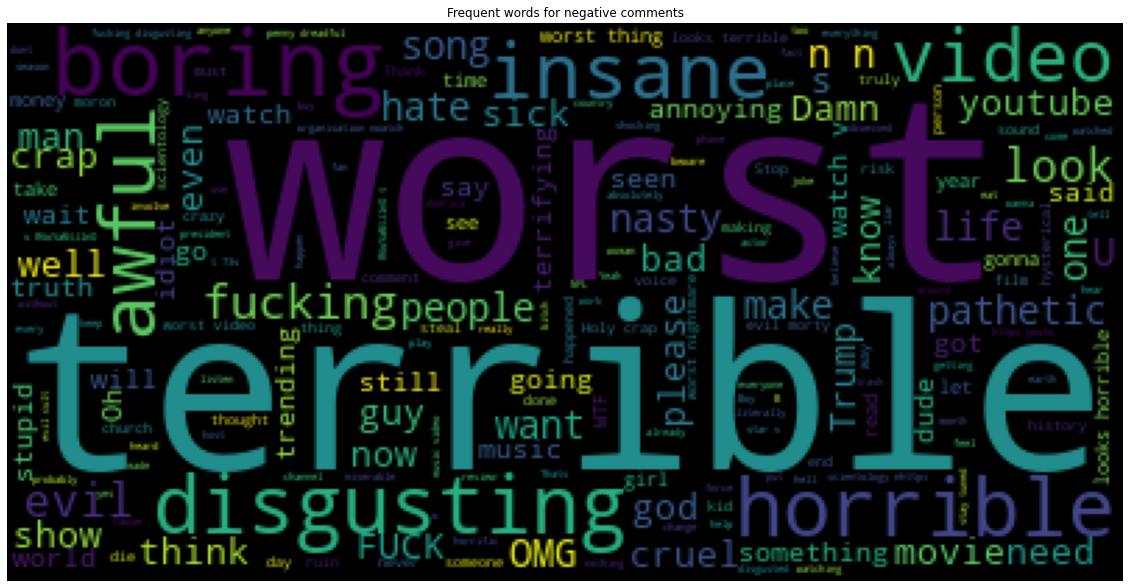

In [21]:
wc=WordCloud(stopwords=STOPWORDS).generate(negative_comments)
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.axis('off')
plt.title('Frequent words for negative comments')
plt.show()

In [22]:
positive_comments=' '.join(comments_positive['comment_text'])

In [23]:
positive_comments

"yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :D This is priceless Summed up perfectly This is awesome. 1:20 XDDDDDDDDD BEST MOVIE EVER!!! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The greatest movie about the greatest movie. It's Harry guys he's Spiderman best friend Best remake ever! Great review! awesome vlog Subscribe to me if Roman Atwood is the best youtuber I was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever. The best part of the movie was the credits DO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃 i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome. 

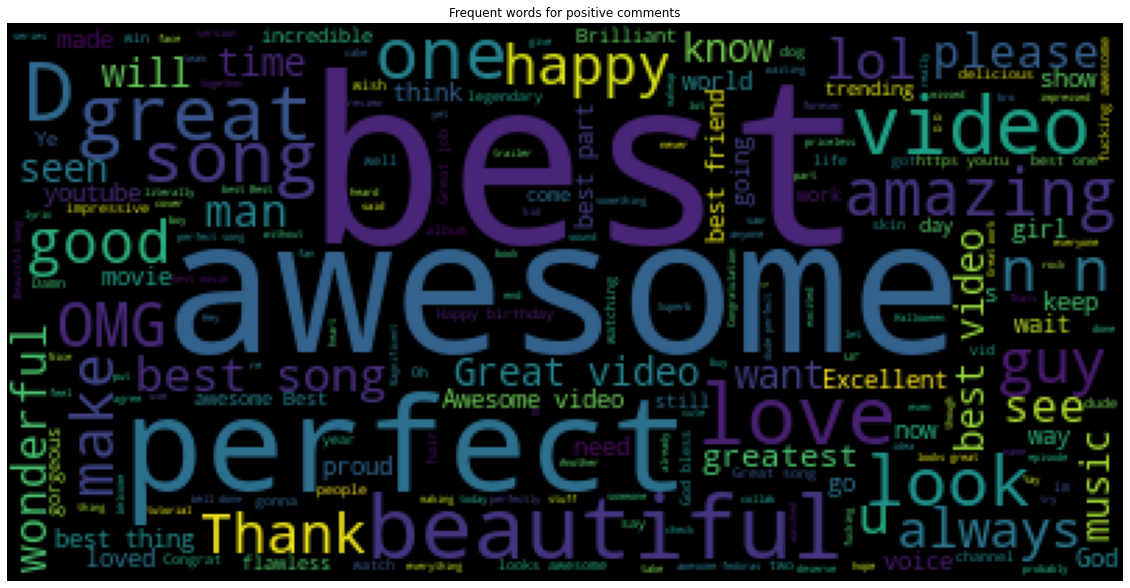

In [24]:
wc2=WordCloud(stopwords=set(STOPWORDS)).generate(positive_comments)
plt.figure(figsize=(20,20))
plt.imshow(wc2)
plt.axis('off')
plt.title('Frequent words for positive comments')
plt.show()

Emojis Analysis

In [25]:
import emoji

In [26]:
emojis_list=[]
for i in comments["comment_text"]:
    for j in i:
        if j in emoji.UNICODE_EMOJI_ENGLISH:
            emojis_list.append(j)

In [27]:
emojis_list[:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [28]:
from collections import Counter

In [29]:
Counter(emojis_list).most_common()

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147),
 ('♥', 4909),
 ('😊', 3596),
 ('🏻', 3438),
 ('💜', 3429),
 ('😬', 3381),
 ('👌', 3112),
 ('💙', 2831),
 ('😢', 2672),
 ('🏼', 2549),
 ('🤣', 2279),
 ('🙌', 2233),
 ('😁', 2220),
 ('💗', 2144),
 ('😱', 2094),
 ('🙏', 1818),
 ('🌍', 1810),
 ('😀', 1734),
 ('💛', 1677),
 ('🏽', 1593),
 ('🤔', 1592),
 ('💓', 1540),
 ('😄', 1496),
 ('😩', 1472),
 ('💯', 1450),
 ('💞', 1420),
 ('😻', 1409),
 ('😎', 1358),
 ('💚', 1295),
 ('😃', 1235),
 ('😮', 1232),
 ('🏾', 1205),
 ('☺', 1180),
 ('😆', 1149),
 ('🐍', 1143),
 ('😅', 1070),
 ('😙', 1067),
 ('💿', 1031),
 ('😉', 998),
 ('💋', 968),
 ('💀', 926),
 ('💩', 925),
 ('🎶', 906),
 ('🤗', 896),
 ('✨', 889),
 ('🖕', 884),
 ('✌', 835),
 ('🔴', 824),
 ('🖤', 784),
 ('🔵', 759),
 ('😥', 742),
 ('🎃', 739),
 ('💘', 702),
 ('😫', 692),
 ('💪', 687),
 ('🎉', 684),
 ('👑', 678),
 ('👎', 673),
 ('😐', 644),
 ('😇', 640),
 ('😒', 629),
 ('💵', 628),
 ('🙄', 627),
 ('😏', 623),
 

In [30]:
emojis=[Counter(emojis_list).most_common(10)[i][0] for i in range(10)]
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [31]:
freq=[Counter(emojis_list).most_common(10)[i][1] for i in range(10)]
freq

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [32]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [33]:
trace=go.Bar(x=emojis,y=freq)

In [34]:
iplot([trace])


In [35]:
import plotly.express as px

In [36]:
fig=px.bar(x=emojis,y=freq)
fig.show()

Combining data of multiple countries

In [38]:
import os

In [39]:
path=r'D:\data analyst\additional_files'

In [40]:
files=os.listdir(path)

In [41]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [42]:
for i in range(1,len(files),2):
    print(i)

1
3
5
7
9
11
13
15
17
19


In [43]:
files_csv=[files[i] for i in range(0,len(files),2)]

In [44]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [45]:
files_csv[0].split('.')[0][0:2]

'CA'

In [46]:
full_df=pd.DataFrame()

for file in files_csv:
    current_df=pd.read_csv(path+'/'+file,encoding='iso-8859-1',error_bad_lines=False)
    
    current_df['country']=file.split('.')[0][0:2]
    full_df=pd.concat([full_df,current_df])
    
    

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





In [47]:
full_df.head(4)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828  132239   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   

                                         description country  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA  
1  STill got a lot of packages. Probably will las...      CA  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA  
3  I know it's been a while since we did this sho...      CA

In [48]:
full_df.shape

(375942, 17)

Analysing liked categories of videos

In [51]:
cat=pd.read_csv('category_file.txt',sep=':')
cat.reset_index(inplace=True)
cat.columns=['category_id','Category_name']
cat.set_index('category_id',inplace=True)
cat

Category_name
category_id                        
1                  Film & Animation
2                  Autos & Vehicles
10                            Music
15                   Pets & Animals
17                           Sports
18                     Short Movies
19                  Travel & Events
20                           Gaming
21                    Videoblogging
22                   People & Blogs
23                           Comedy
24                    Entertainment
25                  News & Politics
26                    Howto & Style
27                        Education
28             Science & Technology
29            Nonprofits & Activism
30                           Movies
31                  Anime/Animation
32                 Action/Adventure
33                         Classics
34                           Comedy
35                      Documentary
36                            Drama
37                           Family
38                          Foreign
39                           Horror
40                   Sci-Fi/Fantasy
41                         Thriller
42                           Shorts
43                            Shows
44             Trailers

In [52]:
dct=cat.to_dict()
dct

{'Category_name': {1: ' Film & Animation',
  2: ' Autos & Vehicles',
  10: ' Music',
  15: ' Pets & Animals',
  17: ' Sports',
  18: ' Short Movies',
  19: ' Travel & Events',
  20: ' Gaming',
  21: ' Videoblogging',
  22: ' People & Blogs',
  23: ' Comedy',
  24: ' Entertainment',
  25: ' News & Politics',
  26: ' Howto & Style',
  27: ' Education',
  28: ' Science & Technology',
  29: ' Nonprofits & Activism',
  30: ' Movies',
  31: ' Anime/Animation',
  32: ' Action/Adventure',
  33: ' Classics',
  34: ' Comedy',
  35: ' Documentary',
  36: ' Drama',
  37: ' Family',
  38: ' Foreign',
  39: ' Horror',
  40: ' Sci-Fi/Fantasy',
  41: ' Thriller',
  42: ' Shorts',
  43: ' Shows',
  44: ' Trailers            '}}

In [53]:
full_df['category_name']=full_df['category_id'].map(dct['Category_name'])

In [54]:
full_df.head(3)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   

                                         description country category_name  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA         Music  
1  STill got a lot of packages. Probably will las...      CA        Comedy  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA        Comedy

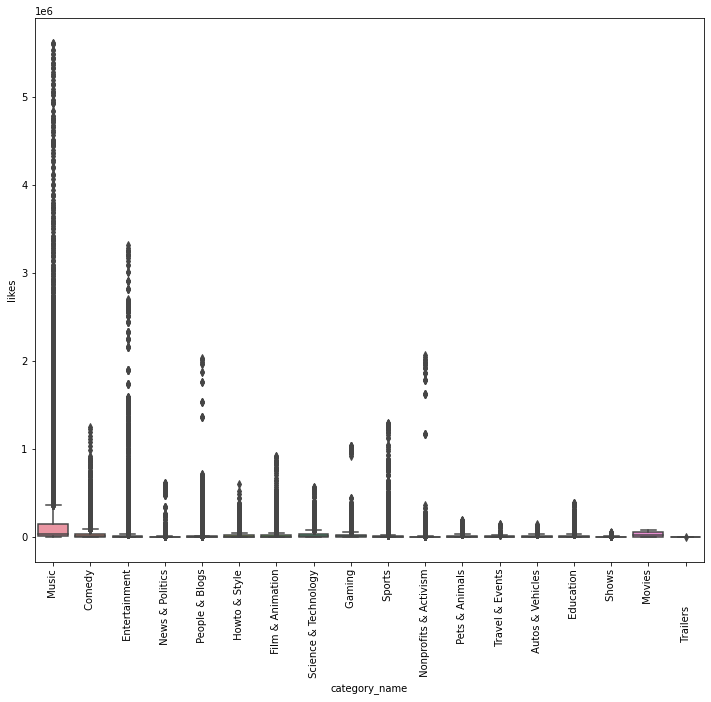

In [56]:
plt.figure(figsize=(12,10))
sns.boxplot(x="category_name",y="likes",data=full_df)
plt.xticks(rotation='vertical')
plt.show()

Audience Interaction and Engagement

In [57]:
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate']=(full_df['comment_count']/full_df['views'])*100

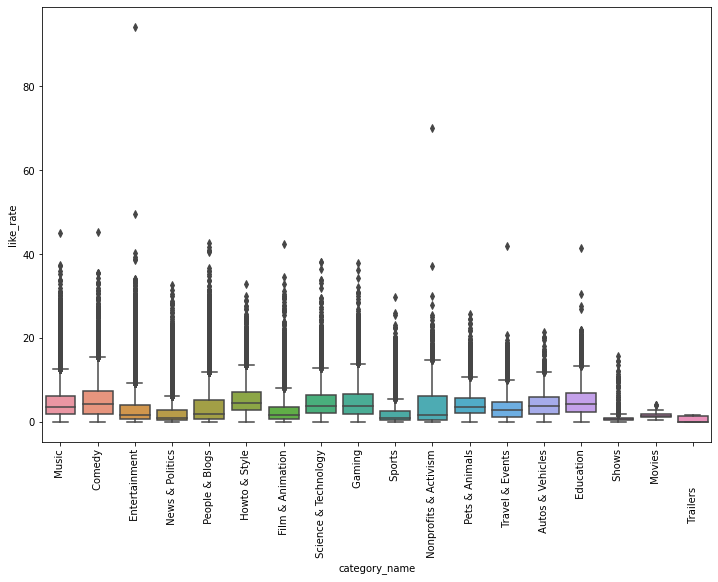

In [58]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='like_rate',data=full_df)
plt.xticks(rotation='vertical')
plt.show()

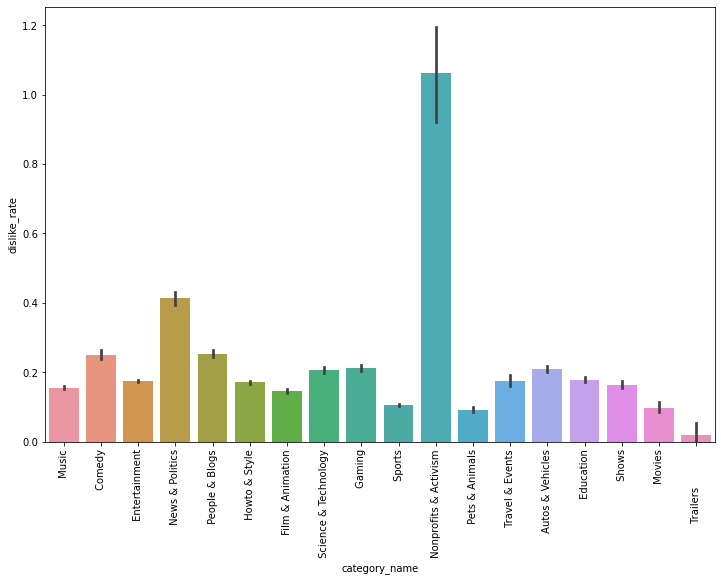

In [60]:
plt.figure(figsize=(12,8))
sns.barplot(x='category_name',y='dislike_rate',data=full_df)
plt.xticks(rotation='vertical')
plt.show()

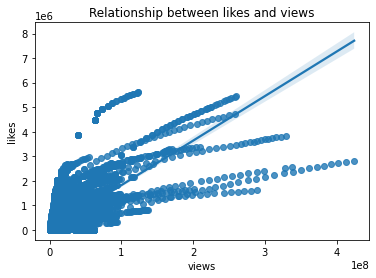

In [62]:
sns.regplot(data=full_df,x='views',y='likes')
plt.title('Relationship between likes and views')
plt.show()

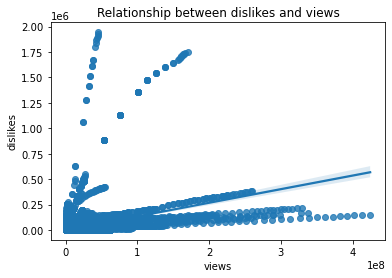

In [65]:
sns.regplot(data=full_df,x='views',y='dislikes')
plt.title('Relationship between dislikes and views')
plt.show()

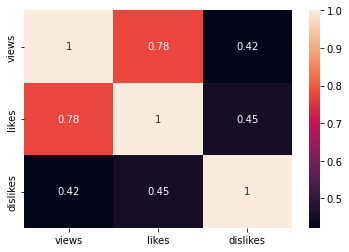

In [64]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(),annot=True)
plt.show()

Which category has the most trending videos

In [74]:
cdf=full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})

In [75]:
import plotly.express as px

In [77]:
px.bar(data_frame=cdf[:20],x="channel_title",y="total_videos")

Does punctuation in comments impact Likes or dislikes

In [79]:
import string

In [80]:
def punc_count(x):
    return len([c for c in x if c in string.punctuation])

In [81]:
sample=full_df[0:10000]

In [82]:
sample['count_punc']=sample['title'].apply(punc_count)

C:\Users\SAIVIG~1\AppData\Local\Temp/ipykernel_34272/1342546377.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



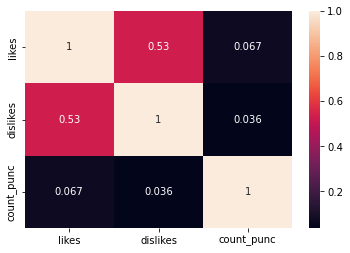

In [86]:
plt.title("Impact of no of punctuations in comments")
sns.heatmap(sample[['likes','dislikes','count_punc']].corr(),annot=True)
plt.show()